# アヤメの二値分類

### 【前準備】

In [1]:
#----インポート----
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler#標準化のライブラリ

#アヤメインスタンスを生成
heacet = load_iris()

#DataFrame型変数（X,y）に格納
X = pd.DataFrame(heacet.data, columns=["sepal_length","sepal_width","petal_length","petal_width"])
y = pd.DataFrame(heacet.target, columns=["Species"])
print(X)
print(y)


#setosa:0・virgicolor:1・virginica:2・sepal_length・petal_length


     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
     Species
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


### 【課題1】練習のために特徴量とカテゴリを選択

In [2]:
#DataFrame型変数dfを作成（X,yを結合）
df = pd.concat([X,y], axis=1)
print(df)

     sepal_length  sepal_width  petal_length  petal_width  Species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


In [3]:
#------------↓------------

#.locメソッドを使い、Setosaをスライス
df_setosa = df.loc[(df['Species'] == 0)] 

#.locメソッドを使い、virgicolorをスライス
df_virgicolor = df.loc[(df['Species'] == 1)]

#.locメソッドを使い、virginicaをスライス
df_virginica = df.loc[(df['Species'] == 2)]

#------------↑------------

#.virgicolorのsepal_lengthをスライス
print("----virgicolorのsepal_length----")
df_virgicolor_sepal_length = df_virgicolor.loc[:,"sepal_length"]
print(df_virgicolor_sepal_length)#virgicolorのsepal_lengthのデータフレーム
print("\n")

#.virgicolorのpetal_lengthをスライス
print("----virgicolorのpetal_length----")
df_virgicolor_petal_length = df_virgicolor.loc[:,"petal_length"]
print(df_virgicolor_petal_length)#virgicolorのpetal_lengthのデータフレーム
print("\n")

#.virginicaのsepal_lengthをスライス
print("----virginicaのsepal_length----")
df_virginica_sepal_length =  df_virginica.loc[:,"sepal_length"]
print(df_virginica_sepal_length)#virginicaのsepal_lengthのデータフレーム
print("\n")

# df_virginica_petal_length = 
print("----virginicaのpetal_length----")
df_virginica_petal_length = df_virginica.loc[:,"petal_length"]
print(df_virginica_petal_length)#virginicaのpetal_lengthのデータフレーム
print("\n")



----virgicolorのsepal_length----
50    7.0
51    6.4
52    6.9
53    5.5
54    6.5
55    5.7
56    6.3
57    4.9
58    6.6
59    5.2
60    5.0
61    5.9
62    6.0
63    6.1
64    5.6
65    6.7
66    5.6
67    5.8
68    6.2
69    5.6
70    5.9
71    6.1
72    6.3
73    6.1
74    6.4
75    6.6
76    6.8
77    6.7
78    6.0
79    5.7
80    5.5
81    5.5
82    5.8
83    6.0
84    5.4
85    6.0
86    6.7
87    6.3
88    5.6
89    5.5
90    5.5
91    6.1
92    5.8
93    5.0
94    5.6
95    5.7
96    5.7
97    6.2
98    5.1
99    5.7
Name: sepal_length, dtype: float64


----virgicolorのpetal_length----
50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0

### 【問題2】データの分析

・sepal_length（がく片の長さ）　×　petal_length（花弁の長さ）


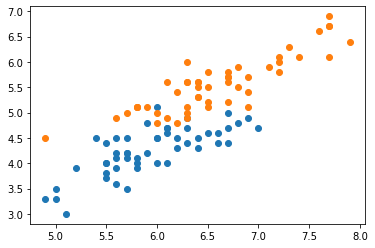

・Iris-virgicolorのsepal_lengthにおける箱ひげ図


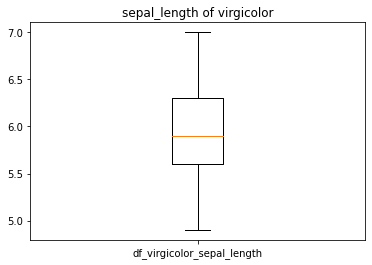

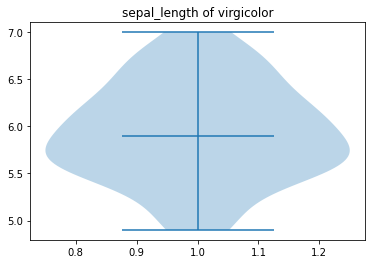

・Iris-virgicolorのpetal_lengthにおける箱ひげ図


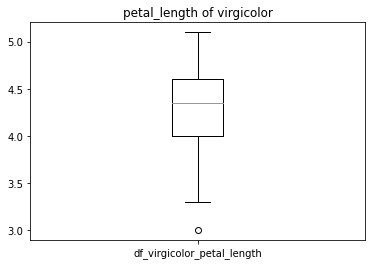

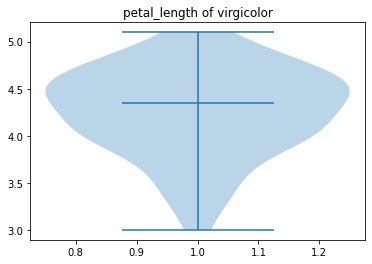

・Iris-virginicaのsepal_lengthにおける箱ひげ図


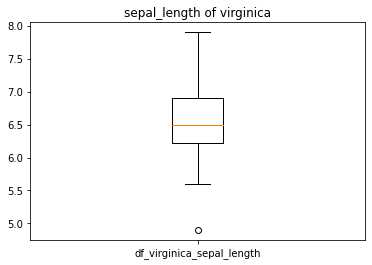

・Iris-virginicaのsepal_lengthにおけるバイオリン図


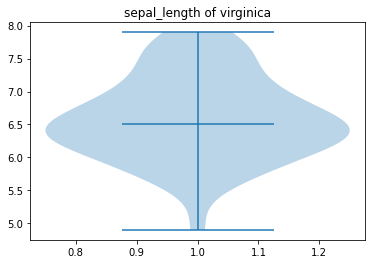

・Iris-virginicaのpetal_lengthにおける箱ひげ図


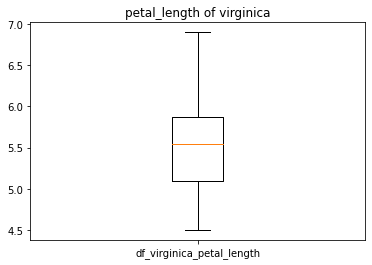

・Iris-virginicaのpetal_lengthにおけるバイオリン図


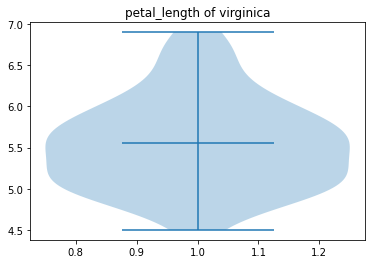

In [4]:
#------------↓------------

#print("●４つの特徴量から２つ選ぶようなすべての組み合わせ（６つ）の散布図を種類ごとに色分けして作る。\n")

#【sepal_lengthの３種類のアヤメのデータ】
# setosa_sepal_length　    df_setosa.loc[:,"sepal_length"]
# virgicolor_sepal_length　df_virgicolor.loc[:,"sepal_length"]
# virgiclor_sepal_length　 df_virginica.loc[:,"sepal_length"]

#【sepal_widthの３種類のアヤメのデータ】
# setosa_sepal_width　     df_setosa.loc[:,"sepal_width"]
# virgicolor_sepal_width　 df_virgicolor.loc[:,"sepal_width"]
# virgiclor_sepal_width　  df_virginica.loc[:,"sepal_width"]

#【petal_lengthの３種類のアヤメのデータ】
# setosa_petal_length　    df_setosa.loc[:,"petal_length"]
# virgicolor__petal_length df_virgicolor.loc[:,"petal_length"]
# virgiclor_petal_length　 df_virginica.loc[:,"petal_length"]

#【petal_widthの３種類のアヤメのデータ】
# setosa_petal_width　     df_setosa.loc[:,"petal_width"]
# virgicolor__petal_width  df_virgicolor.loc[:,"petal_width"]
# virgiclor_petal_width　  df_virginica.loc[:,"petal_width"]


#-------------組み合わせ別の散布図表示６パターン-----------

# ・sepal_length（がく片の長さ）　×　sepal_width（がく片の幅）
# ・sepal_length（がく片の長さ）　×　petal_length（花弁の長さ）☆彡今回はこの組み合わせ☆彡
# ・sepal_length（がく片の長さ）　×　petal_width（花弁の幅）
# ・sepal_width（がく片の幅）　×　petal_length（花弁の長さ）
# ・sepal_width（がく片の幅）　×　petal_width（花弁の幅）
# ・petal_length（花弁の長さ）　×　petal_width（花弁の幅）

#-------------特徴量４種類×目的変数３種類の全組み合わせ１８パターン-----------

#------------↓------------
# print("・sepal_length（がく片の長さ）　×　sepal_width（がく片の幅）")

# X = df_setosa.loc[:,"sepal_length"] #setosaのsepal_length（がく片の長さ）をＸ軸に
# Y = df_setosa.loc[:,"sepal_width"]  #setosaのsepal_width（がく片の幅）をＹ軸に
# plt.scatter(X,Y )                   #setosaのsepal_length（がく片の長さ）　×　sepal_width（がく片の幅）散布図

# X = df_virgicolor.loc[:,"sepal_length"] #virgicolorのsepal_length（がく片の長さ）をＸ軸に
# Y = df_virgicolor.loc[:,"sepal_width"]  #virgicolorのsepal_width（がく片の幅）をＹ軸に
# plt.scatter(X,Y )                       #virgicolorのsepal_length（がく片の長さ）　×　sepal_width（がく片の幅）散布図

# X = df_virginica.loc[:,"sepal_length"] #virginicaのsepal_length（がく片の長さ）をＸ軸に
# Y = df_virginica.loc[:,"sepal_width"]  #virginicaのsepal_width（がく片の幅）をＹ軸に
# plt.scatter(X,Y )                      #virginicaのsepal_length（がく片の長さ）　×　sepal_width（がく片の幅）散布図

# plt.show()
#------------↑------------

#------------↓------------★☆★☆今回はこの２パターンを使う為ここ以外はコメントアウトしている★☆★☆
print("・sepal_length（がく片の長さ）　×　petal_length（花弁の長さ）")
# X = df_setosa.loc[:,"sepal_length"]  #setosaのsepal_length（がく片の長さ）をＸ軸に
# Y = df_setosa.loc[:,"petal_length"]  #setosaのpetal_length（花弁の長さ）をＹ軸に
# plt.scatter(X,Y )                    #setosaのsepal_length（がく片の長さ）　×　petal_length（花弁の長さ）

X = df_virgicolor.loc[:,"sepal_length"] #virgicolorのsepal_length（がく片の長さ）をＸ軸に
Y = df_virgicolor.loc[:,"petal_length"] #virgicolorのpetal_length（花弁の長さ）をＹ軸に
plt.scatter(X,Y )                       #virgicolorのsepal_length（がく片の長さ）　×　sepal_width（がく片の幅）散布図

X = df_virginica.loc[:,"sepal_length"]  #virginicaのsepal_length（がく片の長さ）をＸ軸に
Y = df_virginica.loc[:,"petal_length"]  #virginicaのpetal_length（花弁の長さ）をＹ軸に
plt.scatter(X,Y )                       #virginicaのsepal_length（がく片の長さ）　×　sepal_width（がく片の幅）散布図

plt.show()
#------------↑------------

#------------↓------------
# print("・sepal_length（がく片の長さ）　×　petal_width（花弁の幅）")

# X = df_setosa.loc[:,"sepal_length"] #setosaのsepal_length（がく片の長さ）をＸ軸に
# Y = df_setosa.loc[:,"petal_width"]  #setosaのpetal_width（花弁の幅）をＹ軸に
# plt.scatter(X,Y )                   #setosaのsepal_length（がく片の長さ）　×　petal_width（花弁の幅）散布図

# X = df_virgicolor.loc[:,"sepal_length"] #virgicolorのsepal_length（がく片の長さ）をＸ軸に
# Y = df_virgicolor.loc[:,"petal_width"]  #virgicolorのpetal_width（花弁の幅）をＹ軸に
# plt.scatter(X,Y )                       #virgicolorのsepal_length（がく片の長さ）　×　petal_width（花弁の幅）散布図

# X = df_virginica.loc[:,"sepal_length"] #virginicaのsepal_length（がく片の長さ）をＸ軸に
# Y = df_virginica.loc[:,"petal_width"]  #virginicaのpetal_width（花弁の幅）をＹ軸に
# plt.scatter(X,Y )                      #virginicaのsepal_length（がく片の長さ）　×　petal_width（花弁の幅）散布図

# plt.show()
#------------↑------------

#------------↓------------
# print("・sepal_width（がく片の幅）　×　petal_length（花弁の長さ）")

# X = df_setosa.loc[:,"sepal_width"]  #setosaのsepal_width（がく片の幅）をＸ軸に
# Y = df_setosa.loc[:,"petal_length"] #setosaのpetal_length（花弁の長さ）をＹ軸に
# plt.scatter(X,Y )                   #setosaのsepal_width（がく片の幅）　×　petal_length（花弁の長さ）散布図

# X = df_virgicolor.loc[:,"sepal_width"] #virgicolorのsepal_width（がく片の幅）をＸ軸に
# Y = df_virgicolor.loc[:,"petal_length"]#virgicolorのpetal_length（花弁の長さ）をＹ軸に
# plt.scatter(X,Y )                      #virgicolorのsepal_width（がく片の幅）　×　petal_length（花弁の長さ）散布図

# X = df_virginica.loc[:,"sepal_width"]  #virginicaのsepal_width（がく片の幅）をＸ軸に
# Y = df_virginica.loc[:,"petal_length"] #virginicaのpetal_length（花弁の長さ）をＹ軸に
# plt.scatter(X,Y )                      #virginicaのsepal_width（がく片の幅）　×　petal_length（花弁の長さ）散布図

# plt.show()
#------------↑------------

#------------↓------------
# print("・sepal_width（がく片の幅）　×　petal_width（花弁の幅）")

# X = df_setosa.loc[:,"sepal_width"] #setosaのsepal_width（がく片の幅）をＸ軸に
# Y = df_setosa.loc[:,"petal_width"] #setosaのpetal_width（花弁の幅）をＹ軸に
# plt.scatter(X,Y )                  #setosaのsepal_width（がく片の幅）　×　petal_width（花弁の幅）散布図

# X = df_virgicolor.loc[:,"sepal_width"]  #virgicolorのsepal_width（がく片の幅）をＸ軸に
# Y = df_virgicolor.loc[:,"petal_width"]  #virgicolorのpetal_width（花弁の幅）をＹ軸に
# plt.scatter(X,Y )                       #virgicolorのsepal_width（がく片の幅）　×　petal_width（花弁の幅）散布図

# X = df_virginica.loc[:,"sepal_width"]  #virginicaのsepal_width（がく片の幅）をＸ軸に
# Y = df_virginica.loc[:,"petal_width"]  #virginicaのpetal_width（花弁の幅）をＹ軸に
# plt.scatter(X,Y )                      #virginicaのsepal_width（がく片の幅）　×　petal_width（花弁の幅）散布図

# plt.show()
#------------↑------------

#------------↓------------
# print("・petal_length（花弁の長さ）　×　petal_width（花弁の幅）")

# X = df_setosa.loc[:,"petal_length"] #setosaのpetal_length（花弁の長さ）をＸ軸に
# Y = df_setosa.loc[:,"petal_width"]  #setosaのpetal_width（花弁の幅）をＹ軸に
# plt.scatter(X,Y )                   #setosaのpetal_length（花弁の長さ）　×　petal_width（花弁の幅）散布図

# X = df_virgicolor.loc[:,"petal_length"] #virgicolorのpetal_length（花弁の長さ）をＸ軸に
# Y = df_virgicolor.loc[:,"petal_width"]  #virgicolorのpetal_width（花弁の幅）をＹ軸に
# plt.scatter(X,Y )                       #virgicolorのpetal_length（花弁の長さ）　×　petal_width（花弁の幅）散布図

# X = df_virginica.loc[:,"petal_length"] #virginicaのpetal_length（花弁の長さ）をＸ軸に
# Y = df_virginica.loc[:,"petal_width"]  #virginicaのpetal_width（花弁の幅）をＹ軸に
# plt.scatter(X,Y )                      #virginicaのpetal_length（花弁の長さ）　×　petal_width（花弁の幅）散布図

# plt.show()
#------------↑------------


#-------------箱ひげ図（boxplot）-----------

#------------↓①------------

print("・Iris-virgicolorのsepal_lengthにおける箱ひげ図")
df_virgicolor_sepal_length = df_virgicolor.loc[:,"sepal_length"] #　virgicolor　の　sepal_length　におけるデータフレーム

# 箱ひげ図
fig, ax = plt.subplots()

bp = ax.boxplot(df_virgicolor_sepal_length)
ax.set_xticklabels(["df_virgicolor_sepal_length"])

plt.title('sepal_length of virgicolor')
plt.show()

# バイオリン図

plt.violinplot(df_virgicolor_sepal_length, showmedians=True)
plt.title('sepal_length of virgicolor')
plt.show()

#------------↑①------------

#------------↓②------------

print("・Iris-virgicolorのpetal_lengthにおける箱ひげ図")
df_virgicolor_petal_length = df_virgicolor.loc[:,"petal_length"] #　virgicolor　の　petal_length　におけるデータフレーム

# 箱ひげ図
fig, ax = plt.subplots()

bp = ax.boxplot(df_virgicolor_petal_length)
ax.set_xticklabels(["df_virgicolor_petal_length"])

plt.title('petal_length of virgicolor')
plt.show()

# バイオリン図

plt.violinplot(df_virgicolor_petal_length, showmedians=True)
plt.title('petal_length of virgicolor')
plt.show()

#------------↑②------------

#------------↓③------------

print("・Iris-virginicaのsepal_lengthにおける箱ひげ図")
df_virginica_sepal_length = df_virginica.loc[:,"sepal_length"] #　virginica　の　sepal_length　におけるデータフレーム

# 箱ひげ図
fig, ax = plt.subplots()

bp = ax.boxplot(df_virginica_sepal_length)
ax.set_xticklabels(["df_virginica_sepal_length"])

plt.title('sepal_length of virginica')
plt.show()

# バイオリン図

print("・Iris-virginicaのsepal_lengthにおけるバイオリン図")
plt.violinplot(df_virginica_sepal_length, showmedians=True)
plt.title('sepal_length of virginica')
plt.show()

#------------↑③------------


#------------↓④------------

print("・Iris-virginicaのpetal_lengthにおける箱ひげ図")
df_virginica_petal_length = df_virginica.loc[:,"petal_length"] #　virginica　の　petal_length　におけるデータフレーム

# 箱ひげ図
fig, ax = plt.subplots()

bp = ax.boxplot(df_virginica_petal_length)
ax.set_xticklabels(["df_virginica_petal_length"])

plt.title('petal_length of virginica')
plt.show()

# バイオリン図

print("・Iris-virginicaのpetal_lengthにおけるバイオリン図")
plt.violinplot(df_virginica_petal_length, showmedians=True)
plt.title('petal_length of virginica')
plt.show()

#------------↑④------------



### 【問題3】前処理・訓練データと検証データの分割

In [5]:

#sepal_lengthとpetal_lengthとSpeciesのみスライスしたDF
X = df.loc[: , ['sepal_length','petal_length','Species']]

#sepal_lengthとSpeciesからvirgicolorだけスライス
X_virgicolor = X.loc[(df['Species'] == 1)]
#print(X_virgicolor)

#sepal_lengthとSpeciesからvirginicaだけスライス
X_virginica = X.loc[(df['Species'] == 2)]
#print(X_virginica)

#sepal_lengthとpetal_lengthとvirgicolorとirginicaを集めたデータフレーム
X_Progress = pd.concat([X_virgicolor,X_virginica], axis=0)
#print(X_Progress)

#分割するためX（sepal_lengthとpetal_length）とy（Species）のデータに分ける
X_data = X_Progress.loc[: , ['sepal_length','petal_length']]
y_data = X_Progress.loc[: , ['Species']]

#訓練データと検証データに分割
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)
train_test_split(X, y, shuffle=True)

# print(X_train)
# print(X_test)
# print(y_train)
# print(y_test)


[     sepal_length  petal_length  Species
 115           6.4           5.3        2
 140           6.7           5.6        2
 106           4.9           4.5        2
 47            4.6           1.4        0
 132           6.4           5.6        2
 ..            ...           ...      ...
 42            4.4           1.3        0
 122           7.7           6.7        2
 144           6.7           5.7        2
 30            4.8           1.6        0
 4             5.0           1.4        0
 
 [112 rows x 3 columns],
      sepal_length  petal_length  Species
 91            6.1           4.6        1
 99            5.7           4.1        1
 131           7.9           6.4        2
 59            5.2           3.9        1
 126           6.2           4.8        2
 125           7.2           6.0        2
 5             5.4           1.7        0
 134           6.1           5.6        2
 85            6.0           4.5        1
 141           6.9           5.1        2
 49    

### 【問題4】前処理・標準化

In [6]:
#------------↓X訓練用データの標準化------------

scaler = StandardScaler()      #☆★これは何を表してるのか謎☆★
scaler.fit(X_train)                  #☆★これは何を表してるのか謎☆★
X_train_transform = scaler.fit_transform(X_train)  #☆★これは何を表してるのか謎☆★

#データのタイプを確認
#print(type(X_train_transform))
#------------↑------------


#------------↓X検証用データの標準化------------
# #.reshapeメソッドで次元のndarrayを２次元にした
# X_test_reshape# = X_test.reshape(-1, 1) #１次元のndarrayを[-1，1]の配列にした（scaler.transformは１次元のndarrayでは使えない。）

scaler = StandardScaler()      #☆★これは何を表してるのか謎☆★
scaler.fit(X_test)                  #☆★これは何を表してるのか謎☆★
X_test_transform = scaler.fit_transform(X_test)  #☆★これは何を表してるのか謎☆★

#データのタイプを確認
#print(type(X_test_transform))
#------------↑------------


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### 【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行う


In [7]:
from sklearn.neighbors import KNeighborsClassifier

#パラメータn_neighborsを決めたneighを定義する
neigh = KNeighborsClassifier(n_neighbors=3) 

#.fitメソッドでトレーニングデータセットからk最近傍分類器を適合させる。
neigh.fit(X_train_transform, y_train)

#検証データ(X_test_transform)を引数としてクラスラベル予測データを出力
y_test_pred = neigh.predict(X_test_transform) #neigh.predict(特徴量ndarray)で予測データを作成
print(y_test_pred)

#テストデータXの確率推定値を返す。
#print(neigh.predict_proba(X_test_transform))

[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2 1 1 2 1 2 1 1 2]


### 【問題6】評価
Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 を確認する

In [8]:
print("・最近傍法のAccuracy（正解率）について")

from sklearn.metrics import accuracy_score

#------------↓データの詳細------------
# X_train_transform　X訓練用データの標準化
# y_train　訓練用データの目的変数

# X_test_transform　X検証用データの標準化
# y_test　検証用データの正解目的変数データ

# y_test_pred　検証用データの目的変数の予測データ
#------------↑------------


#accuracy_scoreで正解率を出力
accuracy_score(y_test, y_test_pred) #accuracy_score(正解のデータ, 予測したデータ)で正解率を出す

print(accuracy_score(y_test, y_test_pred, normalize=False))#正解率を出力



・最近傍法のAccuracy（正解率）について
29


In [9]:
from sklearn.metrics import precision_score

print("・最近傍法のPrecision（適合率）について")

#パラメータ'macro'の適合率
print(precision_score(y_test, y_test_pred, average='macro'))

#パラメータ'micro'の適合率
print(precision_score(y_test, y_test_pred, average='micro'))

#パラメータ'weighted'の適合率
print(precision_score(y_test, y_test_pred, average='weighted'))

#パラメータNoneの適合率
print(precision_score(y_test, y_test_pred, average=None))

#ゼロ除算がある場合に返す値を設定する
precision_score(y_test, y_test_pred, average=None, zero_division=1) #★☆★☆ゼロ除算って何

・最近傍法のPrecision（適合率）について
0.8759398496240601
0.8787878787878788
0.8787878787878788
[0.89473684 0.85714286]


array([0.89473684, 0.85714286])

In [10]:
from sklearn.metrics import recall_score

print("・最近傍法のRecall（再現率）について")

#パラメータ'macro'の適合率
print(recall_score(y_test, y_test_pred, average='macro'))

#パラメータ'micro'の適合率
print(recall_score(y_test, y_test_pred, average='micro'))

#パラメータ'weighted'の適合率
print(recall_score(y_test, y_test_pred, average='weighted'))

#パラメータNoneの適合率
print(recall_score(y_test, y_test_pred, average=None))

#パラメータNoneの適合率
print(recall_score(y_test, y_test_pred, average=None))

#ゼロ除算がある場合に返す値を設定する
print(recall_score(y_test, y_test_pred, average=None, zero_division=1)) #★☆★☆ゼロ除算って何


・最近傍法のRecall（再現率）について
0.8759398496240601
0.8787878787878788
0.8787878787878788
[0.89473684 0.85714286]
[0.89473684 0.85714286]
[0.89473684 0.85714286]


In [11]:
from sklearn.metrics import f1_score

print("・最近傍法のF値について")

#パラメータ'macro'の適合率
print(f1_score(y_test, y_test_pred, average='macro'))

#パラメータ'micro'の適合率
print(f1_score(y_test, y_test_pred, average='micro'))

#パラメータ'weighted'の適合率
print(f1_score(y_test, y_test_pred, average='weighted'))

#パラメータNoneの適合率
print(f1_score(y_test, y_test_pred, average=None))

#ゼロ除算がある場合に返す値を設定する
#f1_score(y_test, y_test_pred, zero_division=1) #★☆★☆なぜF値はゼロ除算できないのか

・最近傍法のF値について
0.8759398496240601
0.8787878787878788
0.8787878787878788
[0.89473684 0.85714286]


In [12]:
from sklearn.metrics import confusion_matrix

print("・最近傍法の混同行列（confusion matrix）について")

#混合行列を作成
confusion_matrix(y_test, y_test_pred)#confusion_matrix(配列１, 配列２)


・最近傍法の混同行列（confusion matrix）について


array([[17,  2],
       [ 2, 12]], dtype=int64)

#### ・4種類の指標値の意味について簡単に調査して文章でまとめる

Accuracy（正解率）：正解率とは、全ての予測のうち、正解した予測の割合

Precision（適合率）：適合率とは、システムが出した結果において、本当に正しかったものの割合。

Recall（再現率）：実際に正であるもののうち，正であると予測されたものの割合。

F値：適合率と再現率の調和平均


### 【問題7】可視化

In [13]:
print(X_train_transform.shape)

(67, 2)


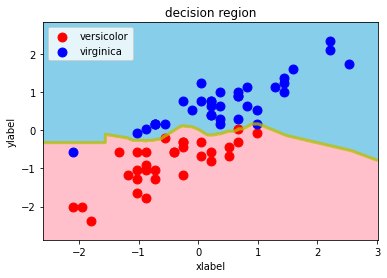

In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
#-------------------------

X = X_train_transform
y = y_train['Species']    

decision_region(X, y, neigh, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])


### 【問題8】他の手法の学習

In [15]:
print("・ロジスティック回帰")

from sklearn.linear_model import LogisticRegression

#訓練用データのデータを用意
X = X_train_transform
y = y_train

#ロジスティック回帰(LogisticRegression)メソッドで学習
clf = LogisticRegression(random_state=0).fit(X, y) 

#検証データ(X_test_transform)を引数としてクラスラベル予測データを出力
y_test_pred = clf.predict(X_test_transform)#clf.predict(特徴量ndarray)で予測データを作成
#print(y_test_pred)

#これがなんだかわかりませんでした
clf.predict_proba(X_test_transform)#確率の見積もり。
print(clf.predict_proba(X_test_transform))


・ロジスティック回帰
[[1.81605216e-01 8.18394784e-01]
 [2.79472833e-02 9.72052717e-01]
 [2.73088860e-02 9.72691114e-01]
 [8.56679853e-01 1.43320147e-01]
 [8.48620832e-01 1.51379168e-01]
 [9.22520648e-01 7.74793517e-02]
 [3.34460881e-01 6.65539119e-01]
 [7.48808694e-03 9.92511913e-01]
 [9.85224303e-01 1.47756969e-02]
 [6.40714120e-01 3.59285880e-01]
 [7.07366553e-01 2.92633447e-01]
 [9.64240695e-01 3.57593046e-02]
 [3.34460881e-01 6.65539119e-01]
 [1.54728554e-01 8.45271446e-01]
 [3.58309160e-02 9.64169084e-01]
 [6.60693894e-01 3.39306106e-01]
 [4.14954674e-01 5.85045326e-01]
 [3.06529495e-01 6.93470505e-01]
 [9.42561771e-01 5.74382290e-02]
 [9.75949300e-01 2.40507003e-02]
 [1.11010625e-03 9.98889894e-01]
 [3.84181481e-01 6.15818519e-01]
 [5.10356434e-01 4.89643566e-01]
 [9.35207231e-01 6.47927690e-02]
 [2.15976495e-01 7.84023505e-01]
 [8.33707919e-01 1.66292081e-01]
 [6.98935508e-01 3.01064492e-01]
 [2.50341164e-01 7.49658836e-01]
 [9.36632419e-01 6.33675810e-02]
 [7.86802414e-04 9.99213198e-01]

In [16]:
print("・ロジスティック回帰のAccuracy（正解率）について")

from sklearn.metrics import accuracy_score

#------------↓データの詳細------------
# X_train_transform　X訓練用データの標準化
# y_train　訓練用データの目的変数

# X_test_transform　X検証用データの標準化
# y_test　検証用データの正解目的変数データ

# y_test_pred　検証用データの目的変数の予測データ
#------------↑------------

#accuracy_scoreで正解率を出力
accuracy_score(y_test, y_test_pred) #accuracy_score(正解のデータ, 予測したデータ)で正解率を出す

#正解率を出力
print(accuracy_score(y_test, y_test_pred, normalize=False))


・ロジスティック回帰のAccuracy（正解率）について
31


In [17]:
from sklearn.metrics import precision_score

print("・ロジスティック回帰のPrecision（適合率）について")

#パラメータ'macro'の適合率
print(precision_score(y_test, y_test_pred, average='macro'))

#パラメータ'micro'の適合率
print(precision_score(y_test, y_test_pred, average='micro'))

#パラメータ'weighted'の適合率
print(precision_score(y_test, y_test_pred, average='weighted'))

#パラメータNoneの適合率
print(precision_score(y_test, y_test_pred, average=None))

#ゼロ除算がある場合に返す値を設定する
precision_score(y_test, y_test_pred, average=None, zero_division=1) #★☆★☆ゼロ除算って何

・ロジスティック回帰のPrecision（適合率）について
0.9375
0.9393939393939394
0.946969696969697
[1.    0.875]


array([1.   , 0.875])

In [18]:
from sklearn.metrics import recall_score

print("・ロジスティック回帰のRecall（再現率）について")

#パラメータ'macro'の適合率
print(recall_score(y_test, y_test_pred, average='macro'))

#パラメータ'micro'の適合率
print(recall_score(y_test, y_test_pred, average='micro'))

#パラメータ'weighted'の適合率
print(recall_score(y_test, y_test_pred, average='weighted'))

#パラメータNoneの適合率
print(recall_score(y_test, y_test_pred, average=None))

#パラメータNoneの適合率
print(recall_score(y_test, y_test_pred, average=None))

#ゼロ除算がある場合に返す値を設定する
print(recall_score(y_test, y_test_pred, average=None, zero_division=1)) #★☆★☆ゼロ除算って何

・ロジスティック回帰のRecall（再現率）について
0.9473684210526316
0.9393939393939394
0.9393939393939394
[0.89473684 1.        ]
[0.89473684 1.        ]
[0.89473684 1.        ]


In [19]:
from sklearn.metrics import f1_score

print("・ロジスティック回帰のF値について")

#パラメータ'macro'の適合率
print(f1_score(y_test, y_test_pred, average='macro'))

#パラメータ'micro'の適合率
print(f1_score(y_test, y_test_pred, average='micro'))

#パラメータ'weighted'の適合率
print(f1_score(y_test, y_test_pred, average='weighted'))

#パラメータNoneの適合率
print(f1_score(y_test, y_test_pred, average=None))

#ゼロ除算がある場合に返す値を設定する
#f1_score(y_test, y_test_pred, zero_division=1) #★☆★☆なぜF値はゼロ除算できないのか

・ロジスティック回帰のF値について
0.9388888888888889
0.9393939393939394
0.9397306397306396
[0.94444444 0.93333333]


In [20]:
from sklearn.metrics import confusion_matrix

print("・ロジスティック回帰の混同行列（confusion matrix）について")

#混合行列を作成
confusion_matrix(y_test, y_test_pred)#confusion_matrix(配列１, 配列２)

・ロジスティック回帰の混同行列（confusion matrix）について


array([[17,  2],
       [ 0, 14]], dtype=int64)

・ロジスティック回帰の決定領域の可視化について


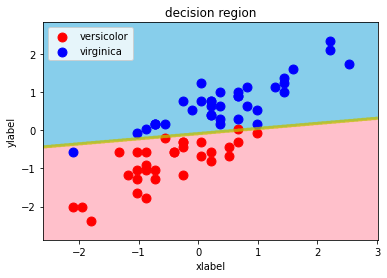

In [21]:
print("・ロジスティック回帰の決定領域の可視化について")

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
#-------------------------

X = X_train_transform
y = y_train['Species']    

decision_region(X, y, clf, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])
    
    
    

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

print("・SVM")

#訓練用データのデータを用意
X = X_train_transform
y = y_train

#これは何を意味するのか
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

#SVMメソッドで学習
clf.fit(X, y)

#検証データ(X_test_transform)を引数としてクラスラベル予測データを出力
y_test_pred = clf.predict(X_test_transform)

#クラスラベル予測データを出力
print(y_test_pred)


・SVM
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 2 2 1 2 1 1 2 1 2 1 1 2]


In [23]:
print("・SVMのAccuracy（正解率）について")

from sklearn.metrics import accuracy_score

#------------↓データの詳細------------
# X_train_transform　X訓練用データの標準化
# y_train　訓練用データの目的変数

# X_test_transform　X検証用データの標準化
# y_test　検証用データの正解目的変数データ

# y_test_pred　検証用データの目的変数の予測データ
#------------↑------------


#accuracy_scoreで正解率を出力
accuracy_score(y_test, y_test_pred) #accuracy_score(正解のデータ, 予測したデータ)で正解率を出す

print(accuracy_score(y_test, y_test_pred, normalize=False))#正解率を出力

・SVMのAccuracy（正解率）について
30


In [24]:

from sklearn.metrics import precision_score

print("・SVMのPrecision（適合率）について")

#パラメータ'macro'の適合率
print(precision_score(y_test, y_test_pred, average='macro'))

#パラメータ'micro'の適合率
print(precision_score(y_test, y_test_pred, average='micro'))

#パラメータ'weighted'の適合率
print(precision_score(y_test, y_test_pred, average='weighted'))

#パラメータNoneの適合率
print(precision_score(y_test, y_test_pred, average=None))

#ゼロ除算がある場合に返す値を設定する
precision_score(y_test, y_test_pred, average=None, zero_division=1) #★☆★☆ゼロ除算って何



・SVMのPrecision（適合率）について
0.9117647058823529
0.9090909090909091
0.9251336898395722
[1.         0.82352941]


array([1.        , 0.82352941])

In [25]:

from sklearn.metrics import recall_score

print("・SVMのRecall（再現率）について")

#パラメータ'macro'の適合率
print(recall_score(y_test, y_test_pred, average='macro'))

#パラメータ'micro'の適合率
print(recall_score(y_test, y_test_pred, average='micro'))

#パラメータ'weighted'の適合率
print(recall_score(y_test, y_test_pred, average='weighted'))

#パラメータNoneの適合率
print(recall_score(y_test, y_test_pred, average=None))

#パラメータNoneの適合率
print(recall_score(y_test, y_test_pred, average=None))

#ゼロ除算がある場合に返す値を設定する
print(recall_score(y_test, y_test_pred, average=None, zero_division=1)) #★☆★☆ゼロ除算って何


・SVMのRecall（再現率）について
0.9210526315789473
0.9090909090909091
0.9090909090909091
[0.84210526 1.        ]
[0.84210526 1.        ]
[0.84210526 1.        ]


In [26]:

from sklearn.metrics import f1_score

print("・SVMのF値について")

#パラメータ'macro'の適合率
print(f1_score(y_test, y_test_pred, average='macro'))

#パラメータ'micro'の適合率
print(f1_score(y_test, y_test_pred, average='micro'))

#パラメータ'weighted'の適合率
print(f1_score(y_test, y_test_pred, average='weighted'))

#パラメータNoneの適合率
print(f1_score(y_test, y_test_pred, average=None))

#ゼロ除算がある場合に返す値を設定する
#f1_score(y_test, y_test_pred, zero_division=1) #★☆★☆なぜF値はゼロ除算できないのか


・SVMのF値について
0.9087557603686636
0.9090909090909091
0.9095936321742772
[0.91428571 0.90322581]


In [27]:

from sklearn.metrics import confusion_matrix

print("・SVMの混同行列（confusion matrix）について")

#混合行列を作成
confusion_matrix(y_test, y_test_pred)#confusion_matrix(配列１, 配列２)


・SVMの混同行列（confusion matrix）について


array([[16,  3],
       [ 0, 14]], dtype=int64)

・SVMの決定領域の可視化について


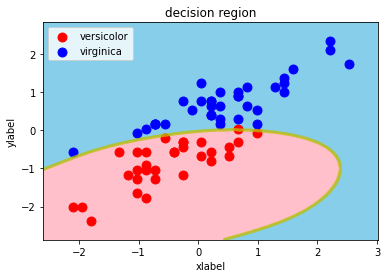

In [28]:
print("・SVMの決定領域の可視化について")

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
#-------------------------

X = X_train_transform
y = y_train['Species']    

decision_region(X, y, clf, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])
    
    

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

print("・決定木")

#訓練用データのデータを用意
X = X_train_transform
y = y_train

#これがなんだかわかりませんでしたモジュールの呼び出し？
clf = DecisionTreeClassifier(random_state=0)

#決定木メソッドで学習
clf = clf.fit(X, y)

#検証データ(X_test_transform)を引数としてクラスラベル予測データを出力
y_test_pred = clf.predict(X_test_transform)

print(y_test_pred)

・決定木
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 2 1 1 2 1 1 2 1 2 1 1 2]


In [30]:
print("・決定木のAccuracy（正解率）について")

from sklearn.metrics import accuracy_score

#------------↓データの詳細------------
# X_train_transform　X訓練用データの標準化
# y_train　訓練用データの目的変数

# X_test_transform　X検証用データの標準化
# y_test　検証用データの正解目的変数データ

# y_test_pred　検証用データの目的変数の予測データ
#------------↑------------


#accuracy_scoreで正解率を出力
accuracy_score(y_test, y_test_pred) #accuracy_score(正解のデータ, 予測したデータ)で正解率を出す

print(accuracy_score(y_test, y_test_pred, normalize=False))#正解率を出力

・決定木のAccuracy（正解率）について
30


In [31]:

from sklearn.metrics import precision_score

print("・決定木のPrecision（適合率）について")

#パラメータ'macro'の適合率
print(precision_score(y_test, y_test_pred, average='macro'))

#パラメータ'micro'の適合率
print(precision_score(y_test, y_test_pred, average='micro'))

#パラメータ'weighted'の適合率
print(precision_score(y_test, y_test_pred, average='weighted'))

#パラメータNoneの適合率
print(precision_score(y_test, y_test_pred, average=None))

#ゼロ除算がある場合に返す値を設定する
precision_score(y_test, y_test_pred, average=None, zero_division=1) #★☆★☆ゼロ除算って何


・決定木のPrecision（適合率）について
0.9055555555555556
0.9090909090909091
0.9114478114478114
[0.94444444 0.86666667]


array([0.94444444, 0.86666667])

In [32]:

from sklearn.metrics import recall_score

print("・決定木のRecall（再現率）について")

#パラメータ'macro'の適合率
print(recall_score(y_test, y_test_pred, average='macro'))

#パラメータ'micro'の適合率
print(recall_score(y_test, y_test_pred, average='micro'))

#パラメータ'weighted'の適合率
print(recall_score(y_test, y_test_pred, average='weighted'))

#パラメータNoneの適合率
print(recall_score(y_test, y_test_pred, average=None))

#パラメータNoneの適合率
print(recall_score(y_test, y_test_pred, average=None))

#ゼロ除算がある場合に返す値を設定する
print(recall_score(y_test, y_test_pred, average=None, zero_division=1)) #★☆★☆ゼロ除算って何


・決定木のRecall（再現率）について
0.9116541353383458
0.9090909090909091
0.9090909090909091
[0.89473684 0.92857143]
[0.89473684 0.92857143]
[0.89473684 0.92857143]


In [33]:

from sklearn.metrics import f1_score

print("・決定木のF値について")

#パラメータ'macro'の適合率
print(f1_score(y_test, y_test_pred, average='macro'))

#パラメータ'micro'の適合率
print(f1_score(y_test, y_test_pred, average='micro'))

#パラメータ'weighted'の適合率
print(f1_score(y_test, y_test_pred, average='weighted'))

#パラメータNoneの適合率
print(f1_score(y_test, y_test_pred, average=None))

#ゼロ除算がある場合に返す値を設定する
#f1_score(y_test, y_test_pred, zero_division=1) #★☆★☆なぜF値はゼロ除算できないのか


・決定木のF値について
0.907735321528425
0.9090909090909091
0.9094298059815301
[0.91891892 0.89655172]


In [34]:

from sklearn.metrics import confusion_matrix

print("・決定木の混同行列（confusion matrix）について")

#混合行列を作成
confusion_matrix(y_test, y_test_pred)#confusion_matrix(配列１, 配列２)


・決定木の混同行列（confusion matrix）について


array([[17,  2],
       [ 1, 13]], dtype=int64)

・決定木の決定領域の可視化について


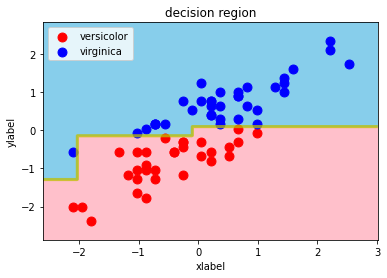

In [35]:
print("・決定木の決定領域の可視化について")

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
#-------------------------

X = X_train_transform
y = y_train['Species']    

decision_region(X, y, clf, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])
    


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

print("・ランダムフォレスト")

#訓練用データのデータを用意
X = X_train_transform
y = y_train

#print(X.shape)
# X, y = make_classification(n_samples=1000, n_features=4,
#                            n_informative=2, n_redundant=0,
#                            random_state=0, shuffle=False)

clf = RandomForestClassifier(max_depth=2, random_state=0)

#訓練用データで学習
clf.fit(X, y)

# print(clf.feature_importances_)
# y_test_pred = clf.predict(X_test_transform)

print(clf.predict(X_test_transform))

・ランダムフォレスト
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 2 1 1 2 1 1 2 1 2 1 1 2]


In [37]:
print("・ランダムフォレストのAccuracy（正解率）について")

from sklearn.metrics import accuracy_score

#------------↓データの詳細------------
# X_train_transform　X訓練用データの標準化
# y_train　訓練用データの目的変数

# X_test_transform　X検証用データの標準化
# y_test　検証用データの正解目的変数データ

# y_test_pred　検証用データの目的変数の予測データ
#------------↑------------


#accuracy_scoreで正解率を出力
accuracy_score(y_test, y_test_pred) #accuracy_score(正解のデータ, 予測したデータ)で正解率を出す

print(accuracy_score(y_test, y_test_pred, normalize=False))#正解率を出力

・ランダムフォレストのAccuracy（正解率）について
30


In [38]:

from sklearn.metrics import precision_score

print("・ランダムフォレストのPrecision（適合率）について")

#パラメータ'macro'の適合率
print(precision_score(y_test, y_test_pred, average='macro'))

#パラメータ'micro'の適合率
print(precision_score(y_test, y_test_pred, average='micro'))

#パラメータ'weighted'の適合率
print(precision_score(y_test, y_test_pred, average='weighted'))

#パラメータNoneの適合率
print(precision_score(y_test, y_test_pred, average=None))

#ゼロ除算がある場合に返す値を設定する
precision_score(y_test, y_test_pred, average=None, zero_division=1) #★☆★☆ゼロ除算って何


・ランダムフォレストのPrecision（適合率）について
0.9055555555555556
0.9090909090909091
0.9114478114478114
[0.94444444 0.86666667]


array([0.94444444, 0.86666667])

In [39]:

from sklearn.metrics import recall_score

print("・ランダムフォレストのRecall（再現率）について")

#パラメータ'macro'の適合率
print(recall_score(y_test, y_test_pred, average='macro'))

#パラメータ'micro'の適合率
print(recall_score(y_test, y_test_pred, average='micro'))

#パラメータ'weighted'の適合率
print(recall_score(y_test, y_test_pred, average='weighted'))

#パラメータNoneの適合率
print(recall_score(y_test, y_test_pred, average=None))

#パラメータNoneの適合率
print(recall_score(y_test, y_test_pred, average=None))

#ゼロ除算がある場合に返す値を設定する
print(recall_score(y_test, y_test_pred, average=None, zero_division=1)) #★☆★☆ゼロ除算って何



・ランダムフォレストのRecall（再現率）について
0.9116541353383458
0.9090909090909091
0.9090909090909091
[0.89473684 0.92857143]
[0.89473684 0.92857143]
[0.89473684 0.92857143]


In [40]:

from sklearn.metrics import f1_score

print("・ランダムフォレストのF値について")

#パラメータ'macro'の適合率
print(f1_score(y_test, y_test_pred, average='macro'))

#パラメータ'micro'の適合率
print(f1_score(y_test, y_test_pred, average='micro'))

#パラメータ'weighted'の適合率
print(f1_score(y_test, y_test_pred, average='weighted'))

#パラメータNoneの適合率
print(f1_score(y_test, y_test_pred, average=None))

#ゼロ除算がある場合に返す値を設定する
#f1_score(y_test, y_test_pred, zero_division=1) #★☆★☆なぜF値はゼロ除算できないのか



・ランダムフォレストのF値について
0.907735321528425
0.9090909090909091
0.9094298059815301
[0.91891892 0.89655172]


In [41]:

from sklearn.metrics import confusion_matrix

print("・ランダムフォレストの混同行列（confusion matrix）について")

#混合行列を作成
confusion_matrix(y_test, y_test_pred)#confusion_matrix(配列１, 配列２)

・ランダムフォレストの混同行列（confusion matrix）について


array([[17,  2],
       [ 1, 13]], dtype=int64)

・ランダムフォレストの決定領域の可視化について


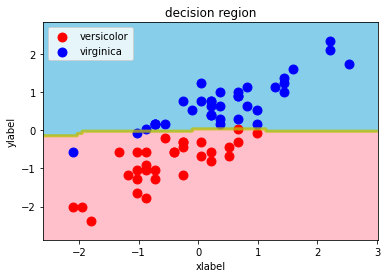

In [42]:
print("・ランダムフォレストの決定領域の可視化について")

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
#-------------------------

X = X_train_transform
y = y_train['Species']    

decision_region(X, y, clf, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])
    


df：特徴量と目的変数を合成したアヤメデータ

df_setosa：dfからSetosaをスライスしたDF
df_virgicolor：dfからvirgicolorをスライスしたDF
df_virginica：dfからvirginicaをスライスしたDF





X_train
X_test
y_train
y_test


X_train_transform　X訓練用データの標準化
y_train　訓練用データの目的変数
X_test_transform　X検証用データの標準化
y_test　検証用データの目的変数


y_test_pred　機械学習で予測したデータ

### 【問題9】（アドバンス課題）標準化の有無の比較

### 【問題10】（アドバンス課題）すべての目的変数を使用して精度が高い手法